In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import pickle
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import itertools
from tabulate import tabulate
import joblib
from joblib import dump
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [3]:
train=pd.read_csv('./dataset/trainData.txt', sep=',')
test=pd.read_csv('./dataset/testData.txt',sep=',')

In [4]:
selected_features=['duration','hot', 'count','protocol_type','service','src_bytes','dst_bytes','flag','land','wrong_fragment','urgent','class']

In [5]:
train=train[selected_features]
train

,duration,hot,count,protocol_type,service,src_bytes,dst_bytes,flag,land,wrong_fragment,urgent,class
0,0,0,2,tcp,ftp_data,491,0,SF,0,0,0,normal
1,0,0,13,udp,other,146,0,SF,0,0,0,normal
2,0,0,123,tcp,private,0,0,S0,0,0,0,anomaly
3,0,0,5,tcp,http,232,8153,SF,0,0,0,normal
4,0,0,30,tcp,http,199,420,SF,0,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,184,tcp,private,0,0,S0,0,0,0,anomaly
125969,8,0,2,udp,private,105,145,SF,0,0,0,normal
125970,0,0,1,tcp,smtp,2231,384,SF,0,0,0,normal
125971,0,0,144,tcp,klogin,0,0,S0,0,0,0,anomaly


In [6]:
total=train.shape[0]
missing_columns= [col for col in train.columns if train[col].isnull().sum()>0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per= (null_count/total)*100
    print(f"{col}:{null_count} ({round(per,3)}%)")

In [7]:
def le(df):
    for col in df.columns:
        if df[col].dtype=='object':
            label_encoder = LabelEncoder()
            df[col]= label_encoder.fit_transform(df[col])
le(train)
le(test)
train

,duration,hot,count,protocol_type,service,src_bytes,dst_bytes,flag,land,wrong_fragment,urgent,class
0,0,0,2,1,20,491,0,9,0,0,0,1
1,0,0,13,2,44,146,0,9,0,0,0,1
2,0,0,123,1,49,0,0,5,0,0,0,0
3,0,0,5,1,24,232,8153,9,0,0,0,1
4,0,0,30,1,24,199,420,9,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,184,1,49,0,0,5,0,0,0,0
125969,8,0,2,2,49,105,145,9,0,0,0,1
125970,0,0,1,1,54,2231,384,9,0,0,0,1
125971,0,0,144,1,30,0,0,5,0,0,0,0


In [8]:
x_train = train.drop(['class'],axis=1)
y_train =train['class']

In [9]:
x_train

,duration,hot,count,protocol_type,service,src_bytes,dst_bytes,flag,land,wrong_fragment,urgent
0,0,0,2,1,20,491,0,9,0,0,0
1,0,0,13,2,44,146,0,9,0,0,0
2,0,0,123,1,49,0,0,5,0,0,0
3,0,0,5,1,24,232,8153,9,0,0,0
4,0,0,30,1,24,199,420,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,184,1,49,0,0,5,0,0,0
125969,8,0,2,2,49,105,145,9,0,0,0
125970,0,0,1,1,54,2231,384,9,0,0,0
125971,0,0,144,1,30,0,0,5,0,0,0


In [10]:

# feature_map=[(i,v) for i,v in itertools.zip_longest(rfe.get_support(),x_train.columns)]
# selected_features = [v for i, v in feature_map if i==True]
# # feature_map
# rfe.get_support()

In [11]:
scale= StandardScaler()
x_train=scale.fit_transform(x_train)
test= scale.fit_transform(test)

In [12]:
X_train,X_test,Y_train,Y_test =train_test_split(x_train,y_train,train_size=0.70,random_state=2)

In [13]:
X_train

array([[-0.11024922, -0.09507567,  2.11244736, ..., -0.01408881,
        -0.08948642, -0.00773599],
       [-0.11024922, -0.09507567,  0.13878877, ..., -0.01408881,
        -0.08948642, -0.00773599],
       [-0.11024922, -0.09507567,  0.23485179, ..., -0.01408881,
        -0.08948642, -0.00773599],
       ...,
       [-0.11024922, -0.09507567,  1.30901112, ..., -0.01408881,
        -0.08948642, -0.00773599],
       [-0.11024922, -0.09507567, -0.55985144, ..., -0.01408881,
        -0.08948642, -0.00773599],
       [ 0.34511562, -0.09507567, -0.72577849, ..., -0.01408881,
        -0.08948642, -0.00773599]])

In [14]:
rfc = RandomForestClassifier()

rfe = RFE(rfc,n_features_to_select=10)
rfe= rfe.fit(x_train,y_train)
with open('anomalierf.pkl', 'wb') as f:
    # Dump the object 'data' into the file 'f'
    pickle.dump(rfe, f)
rf_train,rf_test=rfe.score(X_train,Y_train) , rfe.score(X_test,Y_test)

print(f"Training score: {rf_train}")
print(f"Test score: {rf_test}")

Training score: 0.998820607613885
Test score: 0.9991532599491956


In [15]:
import time
from sklearn.linear_model import LogisticRegression

clfl=LogisticRegression(max_iter=1200000)
start_time=time.time()
clfl.fit(X_train,Y_train.values.ravel())
end_time=time.time()
print("Training time: ",end_time-start_time)

Training time:  1.119394063949585


In [16]:
start_time=time.time()
Y_test_pred = clfl.predict(X_train)
end_time=time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.019870758056640625


In [17]:
lg_model= LogisticRegression(random_state=42)
lg_model.fit(X_train,Y_train)
with open('anomalielgm.pkl', 'wb') as f:
    # Dump the object 'data' into the file 'f'
    pickle.dump(lg_model, f)


In [18]:
lg_train,lg_test=lg_model.score(X_train,Y_train) , lg_model.score(X_test,Y_test)

print(f"Training score: {lg_train}")
print(f"Test score: {lg_test}")

Training score: 0.912656921559066
Test score: 0.9105895427603725


In [19]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [20]:
def objective(trial):
    n_neighbors=trial.suggest_int('KNN_n_neighbors',2,16,log=False)
    classifier_obj=KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(X_train,Y_train)
    accuracy=classifier_obj.score(X_test,Y_test)
    return accuracy

In [21]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective,n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9942315834038951], datetime_start=datetime.datetime(2024, 5, 28, 17, 32, 22, 785685), datetime_complete=datetime.datetime(2024, 5, 28, 17, 33, 22, 92459), params={'KNN_n_neighbors': 11}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [22]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(X_train,Y_train)
with open('anomalieknn.pkl', 'wb') as f:
    # Dump the object 'data' into the file 'f'
    pickle.dump(KNN_model, f)

KNN_train,KNN_test= KNN_model.score(X_train,Y_train),KNN_model.score(X_test,Y_test)

print(f"Training score: {KNN_train}")
print(f"Test score: {KNN_test}")

Training score: 0.9952597498327304
Test score: 0.9942315834038951


In [23]:
# confusion_matrix(X_test,Y_test)
X_train[1]

array([-0.11024922, -0.09507567,  0.13878877, -0.12470616,  1.08730518,
       -0.00776224, -0.00491864, -0.73623464, -0.01408881, -0.08948642,
       -0.00773599])

In [24]:
from sklearn.tree import DecisionTreeClassifier

clfd =DecisionTreeClassifier(criterion='entropy',max_depth=4)
start_time= time.time()
clfd.fit(X_train,Y_train.values.ravel())
end_time=time.time()
print("Training time: ",end_time-start_time)

Training time:  0.3523440361022949


In [25]:
start_time= time.time()
Y_test_pred=clfd.predict(x_train)
end_time=time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.03431510925292969


In [26]:
def objective(trial):
    dt_max_depth=trial.suggest_int('dt_max_depth',2,32,log=False)
    dt_max_features=trial.suggest_int('dt_max_features',2,10,log=False)
    classifier_obj=DecisionTreeClassifier(max_features=dt_max_features,max_depth=dt_max_depth)
    classifier_obj.fit(X_train,Y_train)
    accuracy=classifier_obj.score(X_test,Y_test)
    return accuracy

In [27]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective,n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=24, state=TrialState.COMPLETE, values=[0.9976714648602879], datetime_start=datetime.datetime(2024, 5, 28, 17, 34, 59, 917195), datetime_complete=datetime.datetime(2024, 5, 28, 17, 35, 0, 183081), params={'dt_max_depth': 15, 'dt_max_features': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=24, value=None)


In [28]:
dt =DecisionTreeClassifier(max_features=study_dt.best_trial.params['dt_max_features'],max_depth=study_dt.best_trial.params['dt_max_depth'])
dt.fit(X_train,Y_train)
# dump(dt,'crssri.joblib')
with open('anomalie.pkl', 'wb') as f:
    # Dump the object 'data' into the file 'f'
    pickle.dump(dt, f)
# pickle.dump(dt,open(','wb'))
dt_train,dt_test = dt.score(X_train,Y_train), dt.score(X_test,Y_test)

print(f"Training score: {dt_train}")
print(f"Test score: {dt_test}")

Training score: 0.9985597804515712
Test score: 0.9970364098221846


In [29]:
selected_features

['duration',
 'hot',
 'count',
 'protocol_type',
 'service',
 'src_bytes',
 'dst_bytes',
 'flag',
 'land',
 'wrong_fragment',
 'urgent',
 'class']

In [30]:
data =[
    ["KNN",KNN_train,KNN_test],
    ["Logistic Regression", lg_train,lg_test],
    ["Decision Tree",dt_train,dt_test],
    ["Random Forest", rf_train,rf_test]
]

col_names= ["Model","Train score","Test score"]
print(tabulate(data,headers=col_names,tablefmt=""))

Model                  Train score    Test score
-------------------  -------------  ------------
KNN                       0.99526       0.994232
Logistic Regression       0.912657      0.91059
Decision Tree             0.99856       0.997036
Random Forest             0.998821      0.999153


In [31]:
newdata_scaled=[[-0.11024922, -0.09507567, -0.71704549, -0.12470616, -0.68678521,
       -0.0076786 , -0.00491864,  0.75111129, -0.01408881, -0.08948642,
       -0.00773599]]

In [32]:
with open('C:\\Users\\MKT\\Documents\\tfc\\crssri_app\\network-monitoring-system-with-ML\\anomalie.pkl', 'rb') as f:
    dt_loaded = pickle.load(f)
    start_time=time.time()
    predictions = dt_loaded.predict(newdata_scaled)
    end_time=time.time()
    print("pred: ",end_time-start_time)

pred:  0.0


In [33]:
with open('C:\\Users\\MKT\\Documents\\tfc\\crssri_app\\network-monitoring-system-with-ML\\anomalieknn.pkl', 'rb') as f:
    dt_loaded = pickle.load(f)
    start_time=time.time()
    predictions = dt_loaded.predict(newdata_scaled)
    end_time=time.time()
    print("pred time: ",end_time-start_time)

pred time:  0.008957147598266602


In [34]:
with open('C:\\Users\\MKT\\Documents\\tfc\\crssri_app\\network-monitoring-system-with-ML\\anomalielgm.pkl', 'rb') as f:
    dt_loaded = pickle.load(f)
    start_time=time.time()
    predictions = dt_loaded.predict(newdata_scaled)
    end_time=time.time()
    print("pred: ",end_time-start_time)

pred:  0.00099945068359375


In [35]:
with open('C:\\Users\\MKT\\Documents\\tfc\\crssri_app\\network-monitoring-system-with-ML\\anomalierf.pkl', 'rb') as f:
    dt_loaded = pickle.load(f)
    start_time=time.time()
    predictions = dt_loaded.predict(newdata_scaled)
    end_time=time.time()
    print("pred: ",end_time-start_time)

pred:  0.05918073654174805


In [36]:
predictions

array([1])

In [37]:
with open('C:\\Users\\MKT\\Documents\\tfc\\crssri_app\\network-monitoring-system-with-ML\\anomalie.pkl', 'rb') as f:
    dt_loaded = pickle.load(f)
    start_time=time.time()
    predictions = dt_loaded.predict(X_test)
    end_time=time.time()
    print("pred: ",predictions)

pred:  [1 1 1 ... 0 0 0]


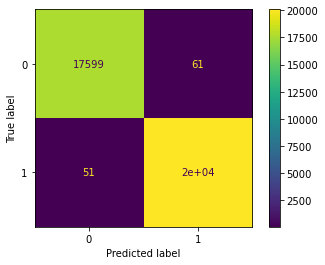

In [41]:
confusion_matrix(Y_test,predictions)

In [42]:
with open('C:\\Users\\MKT\\Documents\\tfc\\crssri_app\\network-monitoring-system-with-ML\\anomalielgm.pkl', 'rb') as f:
    dt_loaded = pickle.load(f)
    start_time=time.time()
    prediction = dt_loaded.predict(X_test)
    end_time=time.time()
    print("pred: ",prediction)

pred:  [1 1 1 ... 0 0 0]


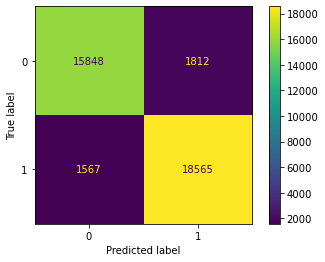

In [43]:
confusion_matrix(Y_test,prediction)

In [44]:
with open('C:\\Users\\MKT\\Documents\\tfc\\crssri_app\\network-monitoring-system-with-ML\\anomalieknn.pkl', 'rb') as f:
    dt_loaded = pickle.load(f)
    start_time=time.time()
    modelprediction = dt_loaded.predict(X_test)
    end_time=time.time()
    print("pred: ",modelprediction)

pred:  [1 1 1 ... 0 0 0]


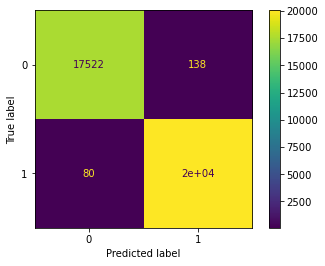

In [45]:
confusion_matrix(Y_test,modelprediction)

In [46]:
with open('C:\\Users\\MKT\\Documents\\tfc\\crssri_app\\network-monitoring-system-with-ML\\anomalierf.pkl', 'rb') as f:
    dt_loaded = pickle.load(f)
    start_time=time.time()
    model_prediction = dt_loaded.predict(X_test)
    end_time=time.time()
    print("pred: ",model_prediction)

pred:  [1 1 1 ... 0 0 0]


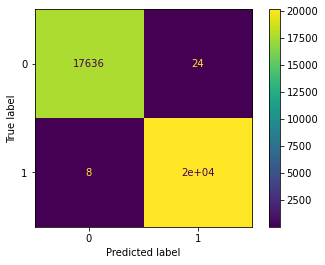

In [47]:
confusion_matrix(Y_test,model_prediction)

In [38]:
# # Chemin du fichier texte
# txt_file_path = './dataset/testData.txt'

# # Fonction pour ouvrir et lire le fichier texte
# def open_txt_file(file_path):
#     with open(file_path, 'r') as txt_file:
#         data = txt_file.read()
#     return data

# # Appel de la fonction pour ouvrir le fichier texte
# txt_data = open_txt_file(txt_file_path)
_data=pd.read_csv('dataset/testData.txt', sep=',')
txt_data = _data.copy()
# test=pd.read_csv('./dataset/testData.txt',sep=',')
# Affichage du contenu du fichier texte
# print(txt_data)
le(txt_data)
label=txt_data['class']

In [39]:
# txt_data.drop(['num_outbound_cmds'],axis=1,inplace=True)
txt_data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1
22540,0,1,22,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1
22541,0,1,22,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0
22542,0,2,11,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,1


In [40]:
def confusion_matrix(actual,predicted):
    confusion_matrix = metrics.confusion_matrix(actual,predicted)
    displayconfmax=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1])
    displayconfmax.plot()
    return plt.show()